> ## Support Vector Regression [SVR]
In this regression, instead of a regression line, a hyperplane is used.\
Points lying insdie/on the hyperplane are allowed errors, Points lying outside the hyperplane are known as support vector,\
Hence this is known as **Support Vector Regression [SVR]**

### Loading Data and preprocessing it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./Datasets/Position_Salaries.csv')
# print(dataset)

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

print(X)
print(y)

# Taking care of Missing values
# from sklearn.impute import SimpleImputer 
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:,:-1])
# X[:,:-1] =  imputer.transform(X[:,:-1])
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer.fit(X[:,-2:-1])
# X[:,-2:-1] =  imputer.transform(X[:,-2:-1])
# print(X)

# Encoding categorial Data [One Hot Encoding]
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[-1])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# # print(X)

# # Splitting dataset into train and test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Feature Scaling

In [2]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_X.fit(X)
X = sc_X.transform(X)

# reshape y
y = y.reshape(len(y),1)

sc_y = StandardScaler()
sc_y.fit(y)
y = sc_y.transform(y)

print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

In [3]:
from sklearn.svm import SVR
regressor =  SVR(kernel='rbf')
regressor.fit(X,y.ravel())

SVR()

### Predict the salary for new test case

In [4]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))
print(y_pred)
y_pred = sc_y.inverse_transform(y_pred.reshape(1,1))
print(y_pred)

[-0.27861589]
[[170370.0204065]]


### Visualising the SVR model

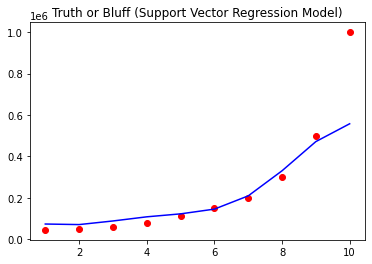

In [5]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(len(y),1)),color='blue')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.show()

### Visualising the SVR model in High Resolution

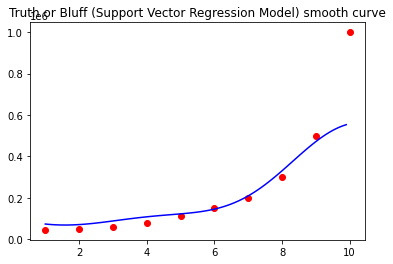

In [6]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(len(X_grid),1)),color='blue')
plt.title('Truth or Bluff (Support Vector Regression Model) smooth curve')
plt.show()